In [3]:
#加载所需的库
import numpy as np
import pandas as pd


In [4]:
#载入之前保存的train_chinese.csv数据，关于泰坦尼克号的任务，我们就使用这个数据
text = pd.read_csv('../titanic/train_chinese.csv')
text.head()


,乘客ID,是否幸存,仓位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 具体请看《利用Python进行数据分析》第五章 排序和排名 部分

#自己构建一个都为数字的DataFrame数据
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
					index=['2', '1'],
					columns=['d', 'a', 'b', 'c'])
frame


,d,a,b,c
2,0,1,2,3
1,4,5,6,7


In [6]:
#将你构建的DataFrame中的数据根据某一列，升序排列
# frame.sort_values(by=['a'],ascending=False)
df = pd.DataFrame({
    'col1': [1, 2, 3, 7, 6, 8],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],

})
df.sort_values(by=['col3'])


,col1,col2,col3
0,1,2,0
1,2,1,1
4,6,7,2
5,8,4,3
3,7,8,4
2,3,9,9


In [7]:
#让行索引升序排序
frame.sort_index()
#让列索引升序排序v
frame.sort_index(axis=1)
#让列索引降序排序
frame.sort_index(axis=1,ascending=False)
#让任选两列数据同时降序排序
frame.sort_values(by=['a', 'c'], ascending=False)


,d,a,b,c
1,4,5,6,7
2,0,1,2,3


In [8]:
#对泰坦尼克号数据（trian.csv）按票价和年龄两列进行综合排序（降序排列）
text.sort_values(by=['票价','年龄'], ascending=False)


,乘客ID,是否幸存,仓位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [9]:
#利用Pandas进行算术计算，计算两个DataFrame数据相加结果
#【提醒】两个DataFrame相加后，会返回一个新的DataFrame，对应的行和列的值会相加，没有对应的会变成空值NaN。
frame1_a = pd.DataFrame(np.arange(9.).reshape(3, 3),
                    columns=['a', 'b', 'c'],
                    index=['one', 'two', 'three'])
frame1_b = pd.DataFrame(np.arange(12.).reshape(4, 3),
                    columns=['a', 'e', 'c'],
                    index=['first', 'one', 'two', 'second'])
frame1_a+frame1_b


,a,b,c,e
first,NaN,NaN,NaN,NaN
one,3.0,NaN,7.0,NaN
second,NaN,NaN,NaN,NaN
three,NaN,NaN,NaN,NaN
two,9.0,NaN,13.0,NaN


In [10]:
#通过泰坦尼克号数据如何计算出在船上最大的家族（‘兄弟姐妹个数’+‘父母子女个数’）有多少人？
max(text['兄弟姐妹个数']+text['父母子女个数'])


10

In [11]:
#学会使用Pandas describe()函数查看数据基本统计信息
frame2 = pd.DataFrame([[1.4, np.nan],
                       [7.1, -4.5],
                       [np.nan, np.nan],
                       [0.75, -1.3]
                      ], index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
frame2.describe()


,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [14]:
#分别看看泰坦尼克号数据集中 票价、父母子女 这列数据的基本统计数据
text['票价'].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: 票价, dtype: float64

In [15]:
text['年龄'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: 年龄, dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

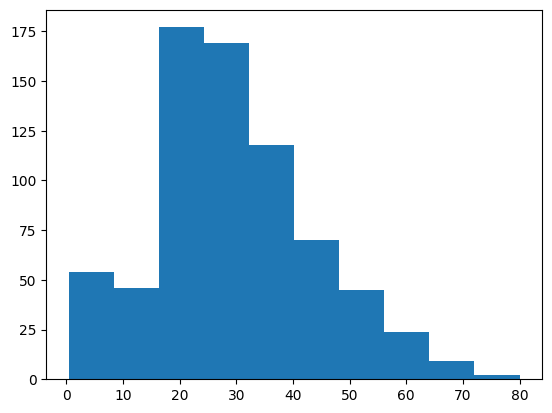

In [13]:
from matplotlib import pyplot as plt
plt.hist(text['年龄'])


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

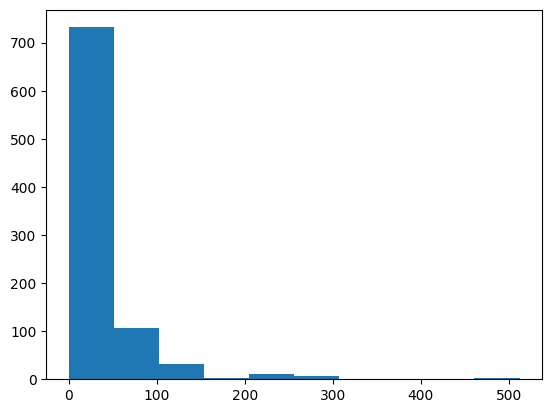

In [16]:
plt.hist(text['票价'])
